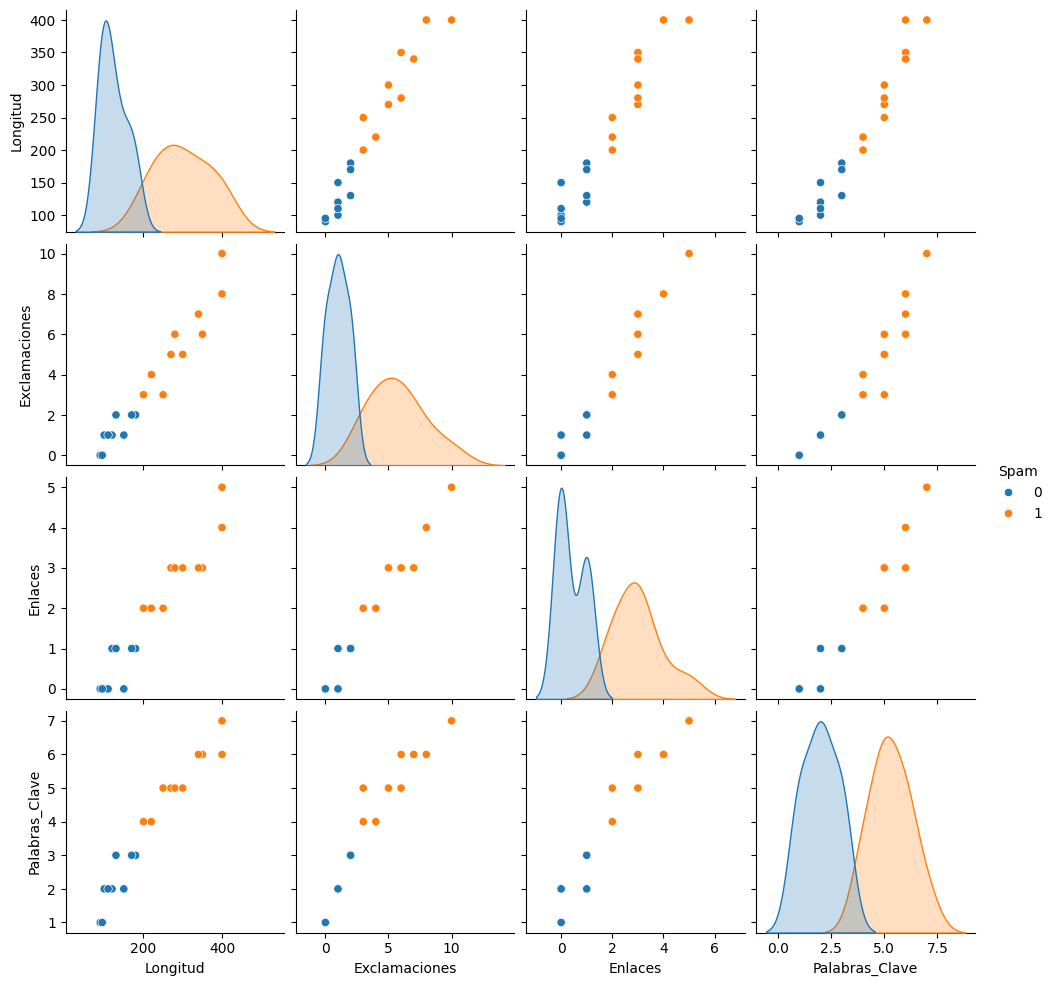

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Crear el conjunto de datos
data = {
    "Longitud": [100, 250, 180, 400, 90, 350, 220, 150, 270, 120,
                 400, 170, 90, 200, 340, 110, 280, 130, 300, 95],
    "Exclamaciones": [1, 3, 2, 10, 0, 6, 4, 1, 5, 1, 8, 2, 0, 3, 7, 1, 6, 2, 5, 0],
    "Enlaces": [0, 2, 1, 5, 0, 3, 2, 0, 3, 1, 4, 1, 0, 2, 3, 0, 3, 1, 3, 0],
    "Palabras_Clave": [2, 5, 3, 7, 1, 6, 4, 2, 5, 2, 6, 3, 1, 4, 6, 2, 5, 3, 5, 1],
    "Spam": [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# 2. Visualizar datos
sns.pairplot(df, hue="Spam", diag_kind="kde")
plt.show()

In [2]:
# 3. División en datos de entrenamiento y prueba
X = df.drop(columns=["Spam"])
y = df["Spam"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Entrenar modelo SVM con kernel RBF
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# 5. Evaluación del modelo
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Precisión del modelo: 1.00

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



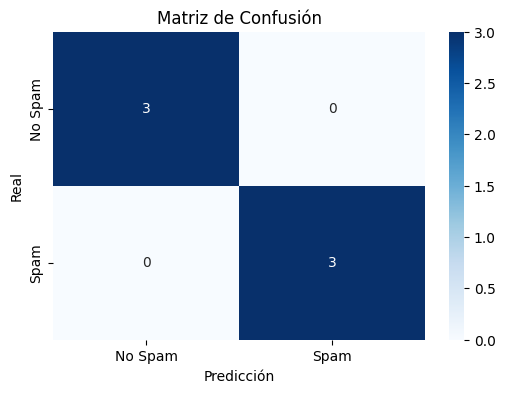

In [3]:
# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# 7. Visualización de matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Spam", "Spam"],
            yticklabels=["No Spam", "Spam"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()